In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.math import confusion_matrix
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(X_train, Y_train) , (X_test, Y_test) = keras.datasets.mnist.load_data()

In [3]:
print(f"{X_train.shape} , {Y_train.shape} , {X_test.shape} , {Y_test.shape}")

(60000, 28, 28) , (60000,) , (10000, 28, 28) , (10000,)


In [4]:
print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

In [5]:
print(X_train[4].shape)

(28, 28)


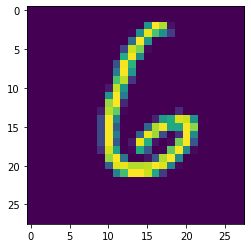

In [6]:
plt.imshow(X_train[32])
plt.show()

In [7]:
print(Y_train[32])

6


In [8]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
print(X_train[4])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - accuracy: 0.8565 - loss: 0.5229
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.9503 - loss: 0.1731
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - accuracy: 0.9653 - loss: 0.1182
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.9734 - loss: 0.0924
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - accuracy: 0.9766 - loss: 0.0781
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9802 - loss: 0.0637
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.9827 - loss: 0.0577
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9856 - loss: 0.0495
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.9869 - loss: 0.0427
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - accuracy: 0.9874 - loss: 0.0399


In [13]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.9699 - loss: 0.1085


[0.09692677855491638, 0.9728999733924866]

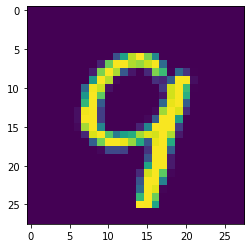

In [15]:
plt.imshow(X_test[16])
plt.show()

In [18]:
print(Y_test[16])

9


In [19]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step


In [20]:
print(Y_pred[16])

[8.5368725e-03 1.9321575e-09 5.3753480e-02 2.3124579e-03 1.3452962e-01
 5.0868672e-05 1.2797938e-04 5.3588170e-01 1.3353460e-01 9.9945647e-01]


In [21]:
print(np.argmax(Y_pred[0]))

7


In [23]:
Y_pred_vals = [np.argmax(i) for i in Y_pred]
print(Y_pred_vals)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [24]:
confusion_matrix = confusion_matrix(Y_test, Y_pred_vals)
print(confusion_matrix)

tf.Tensor(
[[ 967    0    1    0    0    1    5    2    3    1]
 [   0 1122    3    2    0    1    2    1    4    0]
 [   3    2 1006    7    0    0    3    6    4    1]
 [   2    0    6  981    2    4    0    8    4    3]
 [   2    0    8    1  946    2    5    5    2   11]
 [   4    0    0   11    2  849   15    2    8    1]
 [   2    3    1    1    4    2  945    0    0    0]
 [   0    5    8    4    2    0    0 1002    3    4]
 [   6    0    2    7    4    2    4    5  941    3]
 [   2    5    0    8    7    4    1    7    5  970]], shape=(10, 10), dtype=int32)


Text(0.5, 87.0000000000001, 'Predicted values')

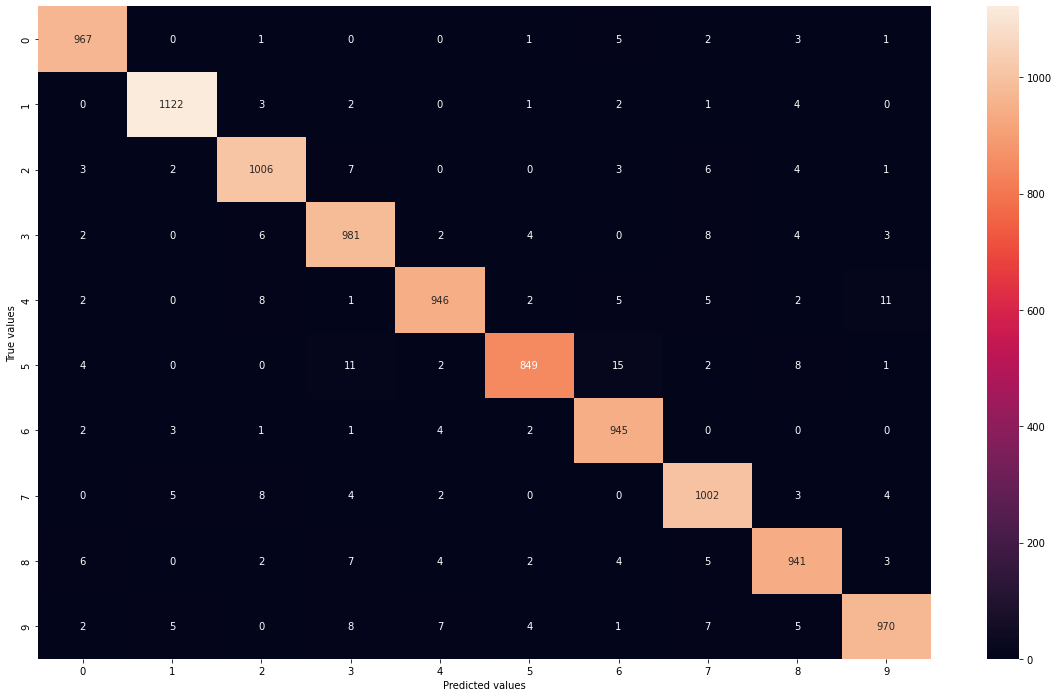

In [25]:
plt.figure(figsize=(20,12))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.ylabel('True values')
plt.xlabel('Predicted values')

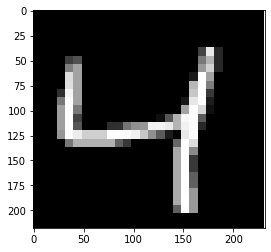

In [29]:
image = cv2.imread("img/four.png")
plt.imshow(image)
plt.show()

In [30]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
resized_image = cv2.resize(gray_image, (28, 28))
normalized_image = resized_image / 255.0
reshaped_image = np.reshape(normalized_image, [1, 28, 28])
prediction = model.predict(reshaped_image)
predicted_digit = np.argmax(prediction)

print('This is', predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
This is 4
